<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook4_1_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

net1 activation:


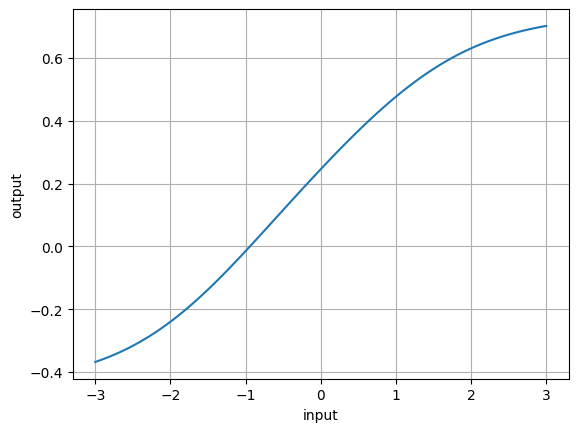

net2 activation:


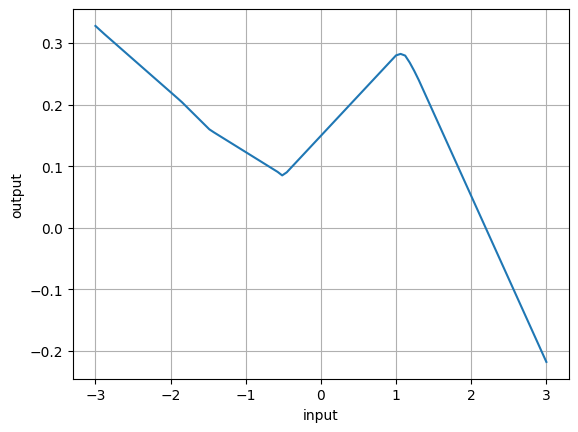

Composed net (net2(net1(x))) activation:


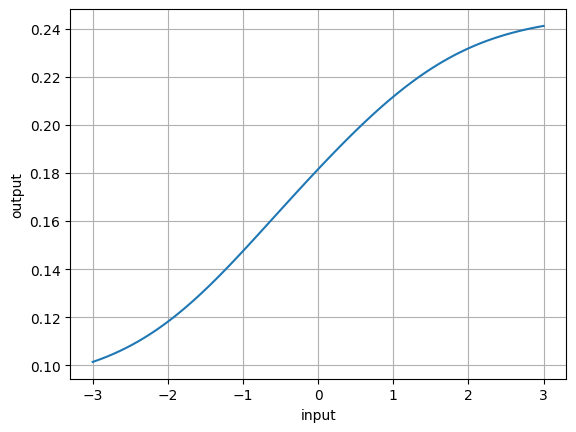

Reversed composed net (net1(net2(x))) activation:


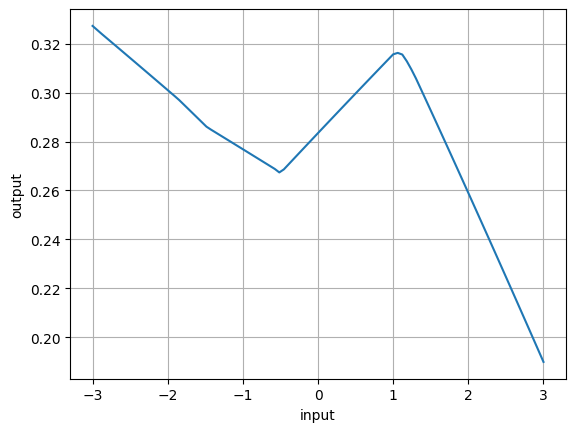

Three-net composition (net5(net2(net1(x)))) activation:


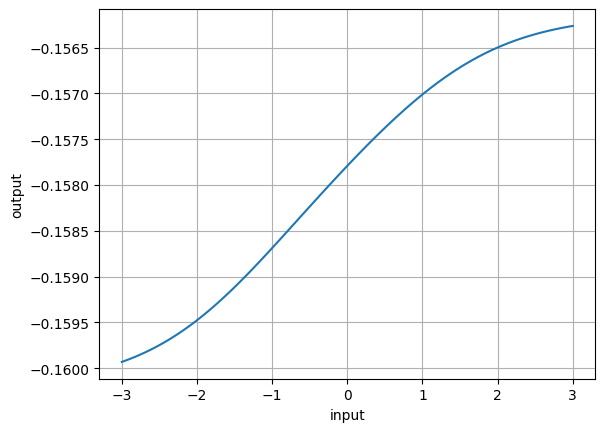

In [2]:

import torch
import matplotlib.pyplot as plt



def show_activation(net, input_range=(-3, 3)):
    x = torch.linspace(*input_range, 100).reshape(-1, 1)
    y = net(x)
    plt.plot(x.numpy(), y.detach().numpy())
    plt.xlabel("input")
    plt.ylabel("output")
    plt.grid(True)
    plt.show()


net1 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 1)
)

net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)


print("net1 activation:")
show_activation(net1)

print("net2 activation:")
show_activation(net2)


class ComposedNet(torch.nn.Module):
    def __init__(self, net1, net2):
        super().__init__()
        self.net1 = net1
        self.net2 = net2

    def forward(self, x):
        out1 = self.net1(x)
        out2 = self.net2(out1)
        return out2

net3 = ComposedNet(net1, net2)

print("Composed net (net2(net1(x))) activation:")
show_activation(net3)


net4 = ComposedNet(net2, net1)

print("Reversed composed net (net1(net2(x))) activation:")
show_activation(net4)


net5 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, 1)
)

class Composed3Net(torch.nn.Module):
    def __init__(self, net1, net2, net3):
        super().__init__()
        self.net1 = net1
        self.net2 = net2
        self.net3 = net3

    def forward(self, x):
        x = self.net1(x)
        x = self.net2(x)
        x = self.net3(x)
        return x

net6 = Composed3Net(net1, net2, net5)

print("Three-net composition (net5(net2(net1(x)))) activation:")
show_activation(net6)
